This notebook creates plots using results from my simulation study.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
file_path = '../result/FINAL_TEST_LINEAR_RESULT_20240131_213804.csv'
df = pd.read_csv(file_path)

In [52]:
df.head()

,true_model,data_source,network_size,effective_sample_size,test_bootstrap_iters,ML_model_name,tuning_param_grid,L_lower,L_upper,L_result,Y_lower,Y_upper,Y_result
0,BBU,../data/simulation/,200000,500,1000,LinearRegression,{},-4.578159,3.597900,U,-0.023142,0.175788,U
1,BBU,../data/simulation/,200000,500,1000,LinearRegression,{},-4.336370,2.641309,U,-0.025647,0.148644,U
2,BBU,../data/simulation/,200000,500,1000,LinearRegression,{},-3.771337,4.126797,U,-0.092930,0.187151,U
3,BBU,../data/simulation/,200000,500,1000,LinearRegression,{},-5.997912,3.682798,U,-0.043172,0.184147,U
4,BBU,../data/simulation/,200000,500,1000,LinearRegression,{},-5.217280,3.550119,U,-0.049659,0.140203,U


In [53]:
df['true_model']

0       BBU
1       BBU
2       BBU
3       BBU
4       BBU
       ... 
2795    BBB
2796    BBB
2797    BBB
2798    BBB
2799    BBB
Name: true_model, Length: 2800, dtype: object

In [54]:
# Assuming 'df' is your DataFrame


# Step 1: Filter rows where the first character of 'true_model' is 'U'
filtered_df = df[df['true_model'].str.startswith('U')]

# Step 2: Group by 'effective_sample_size' and calculate percentage
percentage_df = filtered_df.groupby('effective_sample_size')['L_result'].apply(lambda x: (x == 'U').sum() / len(x) * 100)

# Display the result
print(percentage_df)


effective_sample_size
500     100.0
1000    100.0
2000    100.0
3000    100.0
4000    100.0
5000    100.0
6000    100.0
Name: L_result, dtype: float64


In [55]:
filtered_df.groupby('effective_sample_size')['L_result']


In [56]:
def analyze_data(layer, true_edge_type):
    '''
    layer is either "L" or "Y". 
    true_edge_type is either "U" or "B".
    '''

    if layer == "L":
        filtered_df = df[df['true_model'].str.startswith(true_edge_type)]
    elif layer == "Y":
        filtered_df = df[df['true_model'].str.endswith(true_edge_type)]

    percentage_results = {}

    for size in filtered_df['effective_sample_size'].unique():
        size_df = filtered_df[filtered_df['effective_sample_size'] == size]

        total_count = size_df.shape[0]
        correct_count = size_df[size_df[f'{layer}_result'] == true_edge_type].shape[0]

        percentage_results[size] = (correct_count / total_count) if total_count > 0 else 0

    percentage_df = pd.DataFrame(list(percentage_results.items()), columns=['effective_sample_size', 'correct_rate'])

    return percentage_df

In [57]:
L_layer_U_correct_rate = analyze_data("L", "U")
L_layer_B_correct_rate = analyze_data("L", "B")

Y_layer_U_correct_rate = analyze_data("Y", "U")
Y_layer_B_correct_rate = analyze_data("Y", "B")

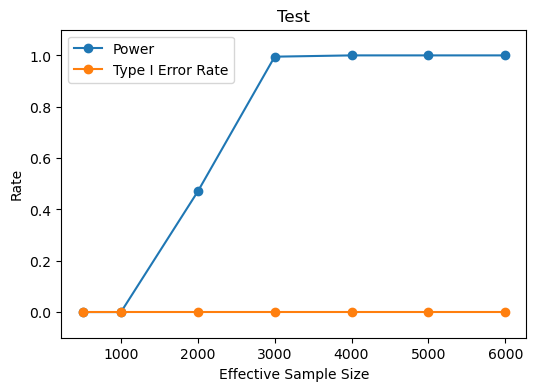

In [64]:
# Inputs to the First Plot
df1 = L_layer_U_correct_rate
X1 = df1['effective_sample_size']
Y1 = 1 - df1['correct_rate']

# Inputs to the Second Plot
df2 = L_layer_B_correct_rate
X2 = df2['effective_sample_size']
Y2 = df2['correct_rate']

plt.figure(figsize=(6, 4))

plt.plot(X2, Y2, marker='o', label='Power')
plt.plot(X1, Y1, marker='o', label='Type I Error Rate')

# Add title and labels
plt.title('L Layer Test')
plt.xlabel('Effective Sample Size')
plt.ylabel('Rate')


plt.ylim(-0.1, 1.1)
plt.legend()
plt.savefig('../result/plot/L Layer Simulation Study.png')

plt.show()


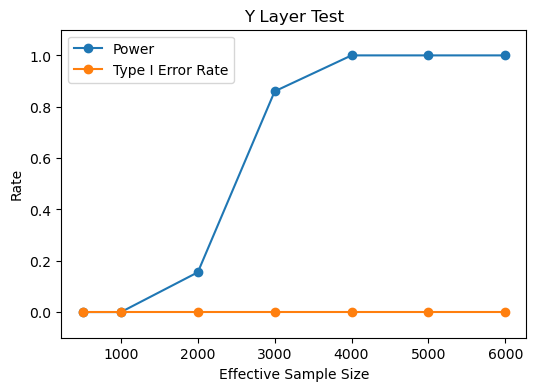

In [59]:
# Inputs to the First Plot
df1 = Y_layer_U_correct_rate
X1 = df1['effective_sample_size']
Y1 = 1 - df1['correct_rate']

# Inputs to the Second Plot
df2 = Y_layer_B_correct_rate
X2 = df2['effective_sample_size']
Y2 = df2['correct_rate']

plt.figure(figsize=(6, 4))

plt.plot(X2, Y2, marker='o', label='Power')
plt.plot(X1, Y1, marker='o', label='Type I Error Rate')

# Add title and labels
plt.title('Y Layer Test')
plt.xlabel('Effective Sample Size')
plt.ylabel('Rate')

plt.ylim(-0.1, 1.1)
plt.legend()
plt.savefig('../result/plot/Y Layer Simulation Study.png')

plt.show()



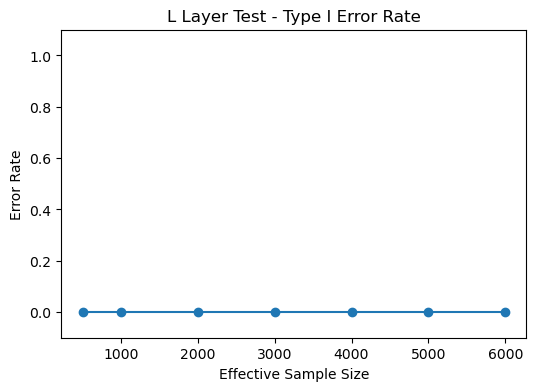

In [62]:
# Inputs to the Plot
TITLE = 'L Layer Test - Type I Error Rate'
X_LABEL = 'Effective Sample Size'
Y_LABEL = 'Error Rate'
df = L_layer_U_correct_rate
X = df['effective_sample_size']
Y = 1 - df['correct_rate']


plt.figure(figsize=(6, 4))
plt.plot(X, Y, marker='o')  # 'o' adds markers to the line
plt.title(TITLE)
plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)
plt.ylim(-0.1, 1.1)
plt.savefig('../result/plot/' + TITLE + '.png') 
plt.show()

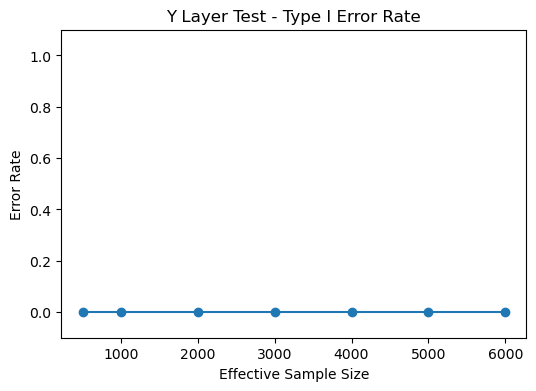

In [63]:
# Inputs to the Plot
TITLE = 'Y Layer Test - Type I Error Rate'
X_LABEL = 'Effective Sample Size'
Y_LABEL = 'Error Rate'
df = Y_layer_U_correct_rate
X = df['effective_sample_size']
Y = 1 - df['correct_rate']


plt.figure(figsize=(6, 4))
plt.plot(X, Y, marker='o')  # 'o' adds markers to the line
plt.title(TITLE)
plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)
plt.ylim(-0.1, 1.1)
plt.savefig('../result/plot/' + TITLE + '.png') 
plt.show()

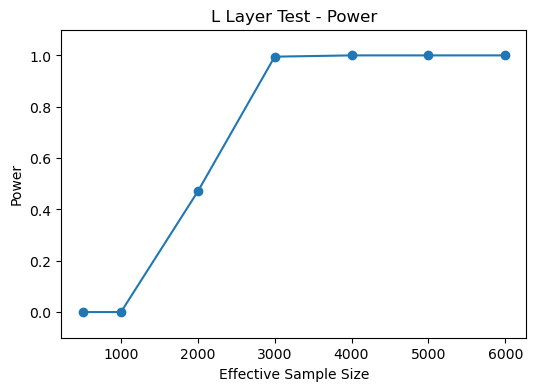

In [60]:
# Inputs to the Plot
TITLE = 'L Layer Test - Power'
X_LABEL = 'Effective Sample Size'
Y_LABEL = 'Power'
df = L_layer_B_correct_rate
X = df['effective_sample_size']
Y = df['correct_rate']

plt.figure(figsize=(6, 4))
plt.plot(X, Y, marker='o')  # 'o' adds markers to the line
plt.title(TITLE)
plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)
plt.ylim(-0.1, 1.1)
plt.savefig('../result/plot/' + TITLE + '.png') 
plt.show()

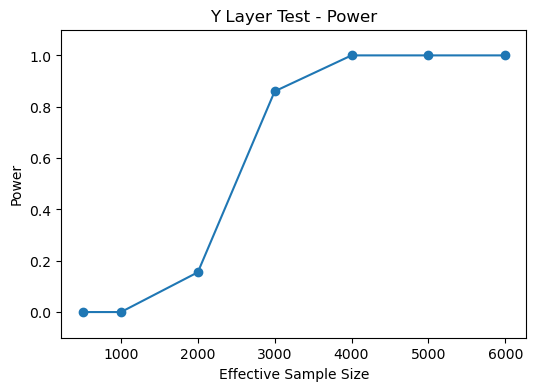

In [61]:
# Inputs to the Plot
TITLE = 'Y Layer Test - Power'
X_LABEL = 'Effective Sample Size'
Y_LABEL = 'Power'
df = Y_layer_B_correct_rate
X = df['effective_sample_size']
Y = df['correct_rate']

plt.figure(figsize=(6, 4))
plt.plot(X, Y, marker='o')  # 'o' adds markers to the line
plt.title(TITLE)
plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)
plt.ylim(-0.1, 1.1)
plt.savefig('../result/plot/' + TITLE + '.png') 
plt.show()